In [62]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [63]:
import os 
os.environ['KMP_DUPLICATE_LIB_OK']='True'

In [65]:
(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()
x_train.shape


(50000, 32, 32, 3)

In [66]:
x_test.shape

(10000, 32, 32, 3)

In [67]:
x_train.shape

(50000, 32, 32, 3)

In [69]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [70]:
y_train = y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [71]:
y_test = y_test.reshape(-1,)

In [72]:
categories = ["aeroplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [76]:
def plot_sample(x,y,index):
    plt.figure(figsize=(15,2))
    plt.imshow(x[index])
    plt.xlabel(categories[y[index]])

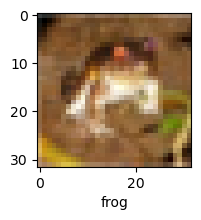

In [77]:
plot_sample(x_train,y_train,0)

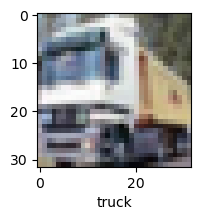

In [78]:
plot_sample(x_train,y_train,1)

In [79]:
x_train = x_train/255.0
x_test = x_test/255.0

In [80]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(32,32,3)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=5)
model.evaluate(x_test, y_test)



Epoch 1/5
1563/1563 [==============================] - 4s 2ms/step - loss: 1.9308 - accuracy: 0.3048
Epoch 2/5
1563/1563 [==============================] - 4s 2ms/step - loss: 1.7683 - accuracy: 0.3715
Epoch 3/5
1563/1563 [==============================] - 4s 2ms/step - loss: 1.7066 - accuracy: 0.3966
Epoch 4/5
1563/1563 [==============================] - 4s 2ms/step - loss: 1.6636 - accuracy: 0.4142
Epoch 5/5
313/313 [==============================] - 1s 2ms/step - loss: 1.5839 - accuracy: 0.4457


[1.5839320421218872, 0.4456999897956848]

In [81]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
y_pred = model.predict(x_test)
y_pred_categories = [np.argmax(element) for element in y_pred]

print("Classification Report: \n",classification_report(y_test,y_pred_categories))

313/313 [==============================] - 1s 3ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.45      0.58      0.51      1000
           1       0.57      0.52      0.54      1000
           2       0.36      0.29      0.32      1000
           3       0.32      0.33      0.32      1000
           4       0.42      0.35      0.38      1000
           5       0.39      0.30      0.34      1000
           6       0.44      0.57      0.50      1000
           7       0.45      0.56      0.50      1000
           8       0.48      0.63      0.55      1000
           9       0.66      0.33      0.44      1000

    accuracy                           0.45     10000
   macro avg       0.45      0.45      0.44     10000
weighted avg       0.45      0.45      0.44     10000



In [82]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),

    layers.Flatten(),
    layers.Dense(64, activation='relu'),

    layers.Dense(10,activation='softmax')
])

In [83]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [84]:
cnn.fit(x_train, y_train, epochs=10)
cnn.evaluate(x_test, y_test)

Epoch 1/10
1563/1563 [==============================] - 15s 9ms/step - loss: 1.4438 - accuracy: 0.4839
Epoch 2/10
1563/1563 [==============================] - 15s 10ms/step - loss: 1.0967 - accuracy: 0.6146
Epoch 3/10
1563/1563 [==============================] - 16s 10ms/step - loss: 0.9779 - accuracy: 0.6593
Epoch 4/10
1563/1563 [==============================] - 16s 10ms/step - loss: 0.8987 - accuracy: 0.6862
Epoch 5/10
1563/1563 [==============================] - 16s 10ms/step - loss: 0.8412 - accuracy: 0.7085
Epoch 6/10
1563/1563 [==============================] - 16s 10ms/step - loss: 0.7829 - accuracy: 0.7268
Epoch 7/10
1563/1563 [==============================] - 17s 11ms/step - loss: 0.7383 - accuracy: 0.7427
Epoch 8/10
1563/1563 [==============================] - 16s 10ms/step - loss: 0.6939 - accuracy: 0.7581
Epoch 9/10
1563/1563 [==============================] - 16s 10ms/step - loss: 0.6574 - accuracy: 0.7697
Epoch 10/10
313/313 [==============================] - 2s 5ms/ste

[0.9189956784248352, 0.7013000249862671]

In [85]:
cnn.evaluate(x_test,y_test)

313/313 [==============================] - 2s 5ms/step - loss: 0.9190 - accuracy: 0.7013


[0.9189956784248352, 0.7013000249862671]

In [86]:
y_pred = cnn.predict(x_test)
y_pred[:5]

313/313 [==============================] - 1s 4ms/step


array([[7.9102966e-04, 1.1678714e-05, 7.4574066e-04, 9.3509191e-01,
        3.0466079e-05, 4.2629723e-02, 1.9376146e-02, 3.1241003e-04,
        4.4807082e-04, 5.6275976e-04],
       [4.8033293e-05, 1.2442070e-03, 9.9948090e-07, 1.0033573e-08,
        4.9856106e-09, 5.1254830e-11, 4.5346858e-11, 5.3370138e-11,
        9.9867785e-01, 2.8951419e-05],
       [1.7265296e-02, 1.9450265e-01, 1.7884039e-04, 1.2107417e-03,
        7.1823748e-04, 1.5400488e-04, 8.0936683e-05, 1.1990626e-03,
        6.5152282e-01, 1.3316731e-01],
       [8.8852513e-01, 4.4655260e-02, 2.3671584e-03, 1.9119744e-03,
        9.0036681e-03, 1.2655704e-05, 1.0814690e-05, 7.7126926e-05,
        5.3223141e-02, 2.1295711e-04],
       [2.6906728e-06, 1.3813098e-05, 6.7001572e-03, 4.3684202e-01,
        3.2231990e-01, 2.5635019e-02, 2.0831768e-01, 7.0756760e-05,
        8.9823188e-05, 8.0460213e-06]], dtype=float32)

In [87]:
y_categories = [np.argmax(element) for element in y_pred]
y_categories[:5]

[3, 8, 8, 0, 3]

In [89]:
 y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

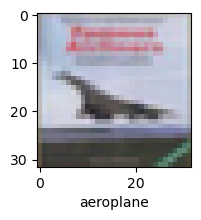

In [96]:
 plot_sample(x_test, y_test,3)

In [97]:
categories[y_categories[3]]

'aeroplane'